# Preparation for Data Mining of the Most Streamed Spotify Songs 2023 Dataset

In this notebook, we will perform preparation of the data for datamining of dataset [Most Streamed Spotify Songs 2023 dataset](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data).

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
from sklearn import preprocessing

Firstly we have to load the data from csv file. 

In [2]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Columns released_month and released_day are unnecesarry for the datamining task so we can drop them.

In [3]:
# delete unnecessary columns 
df = df.drop(['released_month','released_day'], axis=1)

In [4]:
#check for null values
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [5]:
#check for duplicates
df.duplicated().sum()

0

Since the 'key' value is really important for analysis of music we have to delete the rows with 'key' information missing, its type of attribute we cant really fill with most used value for example.

In [6]:
#remove the data missing 'key' value
df = df.dropna(subset=['key'])

Since the values missing from 'in_shazam_charts' most likely mean that those songs didnt make it to charts, we chosed to fill missing informations with max_rank + 1 obtained from the data

In [7]:
#replace the null values of in_shazam_charts with average value
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
df['in_shazam_charts'] = df['in_shazam_charts'].astype(float)
max_value = df['in_shazam_charts'].max()
df['in_shazam_charts'].fillna(max_value+1, inplace=True)



In [8]:
#check for null values
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [9]:
#check the data types of the attributes
print(df.dtypes)

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object


In next part we have to convert 'streams' and 'in_deezer_playlist' to numeric data type and check for null values.

In [10]:
#convert the streams and in_deezer_playlist to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

In [11]:
#check for null values in streams and in_deezer_playlists
print("Stream null values:",df['streams'].isnull().sum())
print("In_deezer_playlists null values:",df['in_deezer_playlists'].isnull().sum())

Stream null values: 1
In_deezer_playlists null values: 75


In [12]:
#remove the data missing 'streams' value
df = df.dropna(subset=['streams'])
#missing value in 'in_deezer_playlists' is replaced with 0, since it probably means that the song is not in any playlist
df['in_deezer_playlists'].fillna(0, inplace=True)

In [13]:
#check for null values in streams and in_deezer_playlists again
print("Stream null values:",df['streams'].isnull().sum())
print("In_deezer_playlists null values:",df['in_deezer_playlists'].isnull().sum())

Stream null values: 0
In_deezer_playlists null values: 0


<Axes: xlabel='streams'>

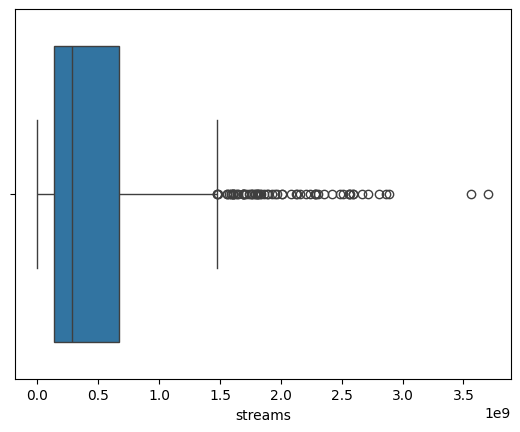

In [14]:
#check for outliers in the streams column
#firstly check if all values are numeric

sns.boxplot(x=df['streams'])


In [15]:
#calculate IQR max and min
Q1 = df['streams'].quantile(0.25)
Q3 = df['streams'].quantile(0.75)
IQR = Q3 - Q1
MAX = Q3 + 1.5 * IQR
#replace the ourliers with the max value
df['streams'] = df['streams'].mask(df['streams'] > MAX, MAX)

<Axes: xlabel='streams'>

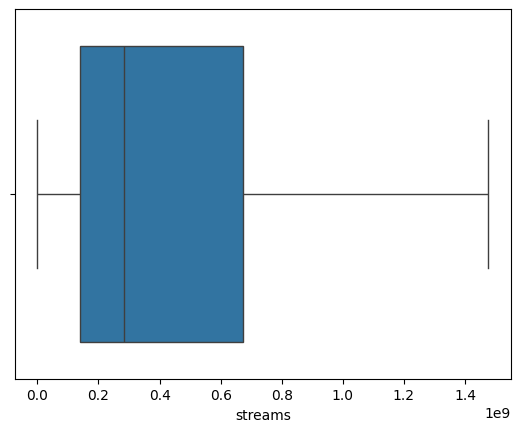

In [16]:
sns.boxplot(x=df['streams'])

Chosen DM task was : Platform comparison: Compare the song's popularity across different music platforms, so now we prepare 2 datasets one with only numeric attributes and other with categorical attributes.

In [17]:
#create 2 copies of the dataframe for discreditation and normalization
df_disc = df.copy()
df_norm = df.copy()

In [18]:
#choose all numerical attributes from df_norm except artist_count, released_year, released_month, released_day
df_norm_num = df_norm.select_dtypes(include=['float64', 'int64'])
#drop columns artist_count, released_year, released_month, released_day since its not needed for normalization
df_norm_num = df_norm_num.drop(['artist_count', 'released_year'], axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
df_norm_np = min_max_scaler.fit_transform(df_norm_num)
df_norm = pd.DataFrame(df_norm_np, columns=df_norm_num.columns)
df_norm.head()


,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.009874,1.000000,0.095760,0.063988,0.956364,0.046632,0.217391,0.568871,0.425532,0.780822,0.913978,0.831325,0.319588,0.000000,0.053191,0.032258
1,0.027295,0.326531,0.090568,0.071429,0.458182,0.060104,0.304348,0.263085,0.191489,0.657534,0.612903,0.722892,0.072165,0.000000,0.074468,0.032258
2,0.025838,0.768707,0.094827,0.139881,0.752727,0.094301,0.304348,0.653581,0.517730,0.383562,0.301075,0.469880,0.175258,0.000000,0.297872,0.064516
3,0.148051,0.680272,0.542431,0.172619,0.752727,0.129534,0.260870,0.377410,0.744681,0.438356,0.580645,0.698795,0.113402,0.000000,0.085106,0.209677
4,0.058676,0.340136,0.205389,0.125000,0.483636,0.090155,0.326087,0.292700,0.560284,0.575342,0.204301,0.795181,0.144330,0.692308,0.085106,0.064516


In [19]:
#check different values of 'key' and 'mode' attributes
print(df['key'].value_counts())
print(df['mode'].value_counts())
print(df['key'].dtype)
print(df['mode'].dtype)

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      74
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64
mode
Major    474
Minor    383
Name: count, dtype: int64
object
object


In [20]:
# convert key and mode to numeric values
df_numeric = df[['key', 'mode']]
key_classes = ['C#', 'G', 'G#', 'F', 'B', 'D', 'A', 'F#','E', 'A#', 'D#']
mode_classes = ['Minor', 'Major']
enc = preprocessing.OneHotEncoder(categories=[key_classes, mode_classes])
enc.fit(df_numeric)
df_numeric_np = enc.transform(df_numeric).toarray()
df_numeric = pd.DataFrame(df_numeric_np)
df_numeric.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
#concatenate the two dataframes df_numeric and df_norm
df_norm = pd.concat([df_norm, df_numeric], axis=1)
df_norm = pd.concat([df_norm, df[['artist_count', 'released_year']]], axis=1)
df_norm.head()

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,...,5,6,7,8,9,10,11,12,artist_count,released_year
0,0.009874,1.000000,0.095760,0.063988,0.956364,0.046632,0.217391,0.568871,0.425532,0.780822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2023.0
1,0.027295,0.326531,0.090568,0.071429,0.458182,0.060104,0.304348,0.263085,0.191489,0.657534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2023.0
2,0.025838,0.768707,0.094827,0.139881,0.752727,0.094301,0.304348,0.653581,0.517730,0.383562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2023.0
3,0.148051,0.680272,0.542431,0.172619,0.752727,0.129534,0.260870,0.377410,0.744681,0.438356,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2019.0
4,0.058676,0.340136,0.205389,0.125000,0.483636,0.090155,0.326087,0.292700,0.560284,0.575342,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2023.0


In [22]:
#from df_disc discretize the numerical attributes
df_disc_num = df_disc.select_dtypes(include=['float64', 'int64'])
df_disc_num.head()

#discretize the numerical attributes
df_disc_num['streams'] = pd.qcut(df_disc_num['streams'], 4, labels=['very low', 'low', 'high', 'very high'])
df_disc_num['in_spotify_playlists'] = pd.qcut(df_disc_num['in_spotify_playlists'], 4, labels=['very low', 'low', 'high', 'very high'])
df_disc_num['in_spotify_charts'] = pd.qcut(df_disc_num['in_spotify_charts'], 4, labels=['low', 'medium', 'high'], duplicates='drop')
df_disc_num['in_shazam_charts'] = pd.qcut(df_disc_num['in_shazam_charts'], 4, labels=[ 'low', 'medium', 'high'], duplicates='drop')
df_disc_num['in_apple_charts'] = pd.qcut(df_disc_num['in_apple_charts'], 4, labels=['very low' ,'low','high', 'very high'])
df_disc_num['in_apple_playlists'] = pd.qcut(df_disc_num['in_apple_playlists'], 4, labels=['very low', 'low', 'high', 'very high'])
df_disc_num = df_disc_num.drop(['in_deezer_charts'], axis=1)
df_disc_num['in_deezer_playlists'] = pd.qcut(df_disc_num['in_deezer_playlists'], 4, labels=['very low', 'low', 'high', 'very high'])
df_disc_num['bpm'] = pd.qcut(df_disc_num['bpm'], 4, labels=['low', 'medium', 'high', 'very high'])
df_disc_num['danceability_%'] = pd.qcut(df_disc_num['danceability_%'], 4, labels=['low', 'medium', 'high', 'very high'])
df_disc_num['valence_%'] = pd.qcut(df_disc_num['valence_%'], 4, labels=['low', 'medium', 'high', 'very high'])
df_disc_num['energy_%'] = pd.qcut(df_disc_num['energy_%'], 4, labels=['low', 'medium', 'high', 'very high'])
df_disc_num['acousticness_%'] = pd.qcut(df_disc_num['acousticness_%'], 4, labels=['low', 'medium', 'high', 'very high'])
df_disc_num['instrumentalness_%'] = pd.qcut(df_disc_num['instrumentalness_%'], 1, labels=['medium'], duplicates='drop')
df_disc_num['liveness_%'] = pd.qcut(df_disc_num['liveness_%'], 4, labels=['low', 'medium', 'high', 'very high'])
df_disc_num['speechiness_%'] = pd.qcut(df_disc_num['speechiness_%'], 4, labels=['low', 'medium', 'high', 'very high'])
df_disc_num['artist_count'] = pd.qcut(df_disc_num['artist_count'], 3, labels=['low','high'], duplicates='drop')
df_disc_num['released_year'] = pd.qcut(df_disc_num['released_year'], 2, labels=['old','recent'])
df_disc_num.head()

,artist_count,released_year,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,low,recent,very low,high,low,high,very high,high,high,high,very high,very high,very high,high,medium,low,low
1,low,recent,low,high,very low,high,very high,high,high,low,high,high,high,medium,medium,low,low
2,low,recent,low,high,low,very high,very high,high,high,high,low,low,low,medium,medium,very high,medium
3,low,old,very high,high,very high,very high,very high,very high,high,very high,low,high,high,medium,medium,medium,very high
4,low,recent,high,high,high,high,very high,high,high,very high,medium,low,very high,medium,medium,medium,medium


In [23]:
#concatenate df_disc_num with the rest of the attributes from df
df_disc_num = pd.concat([df_disc_num, df[['key', 'mode', 'track_name', 'artist(s)_name']]], axis=1)
df_disc_num.head()

,artist_count,released_year,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_shazam_charts,bpm,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key,mode,track_name,artist(s)_name
0,low,recent,very low,high,low,high,very high,high,high,high,...,very high,very high,high,medium,low,low,B,Major,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook"
1,low,recent,low,high,very low,high,very high,high,high,low,...,high,high,medium,medium,low,low,C#,Major,LALA,Myke Towers
2,low,recent,low,high,low,very high,very high,high,high,high,...,low,low,medium,medium,very high,medium,F,Major,vampire,Olivia Rodrigo
3,low,old,very high,high,very high,very high,very high,very high,high,very high,...,high,high,medium,medium,medium,very high,A,Major,Cruel Summer,Taylor Swift
4,low,recent,high,high,high,high,very high,high,high,very high,...,low,very high,medium,medium,medium,medium,A,Minor,WHERE SHE GOES,Bad Bunny


In the last part we export first 50 rows from both datasets into CSV files.

In [24]:
#export first 50 rows from df_norm and df_disc_num to csv files
df_norm.head(50).to_csv('df_norm.csv', index=False)
df_disc_num.head(50).to_csv('df_disc_num.csv', index=False)